In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Monte Carlo Test

## Being Given Measurments


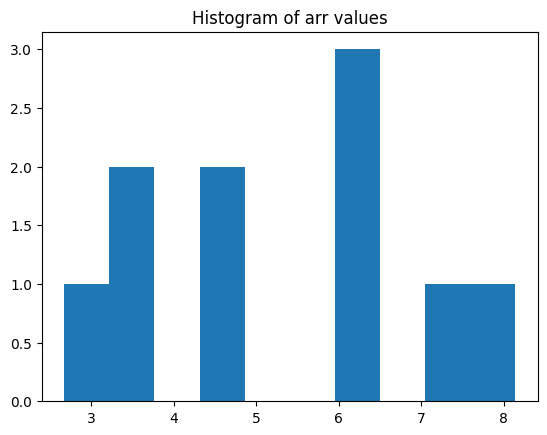

In [2]:
arr = np.array([6.20, 4.34, 8.14, 6.24, 3.72, 3.54, 4.35, 2.67, 7.16, 6.00])

plt.hist(arr)
plt.title("Histogram of arr values")
plt.show()

## Mean and Standard deviation of measurments

In [3]:
mean = np.mean(arr)
std = np.std(arr)

print(f"{mean=} +/- {std}")

mean=5.236 +/- 1.6734049121476848


## Sampling from Normal Distribution with given parameters and Calculating mean

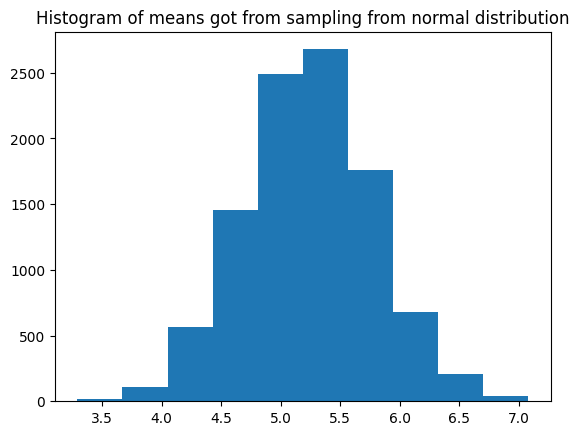

In [4]:
N = int(1e4)
np.random.seed(42)

sampled_means = []


for i in range(N):
    sampled_means.append(np.mean(np.random.normal(loc=mean, scale=std, size=len(arr))))

plt.hist(sampled_means)
plt.title("Histogram of means got from sampling from normal distribution")
plt.show()

## Confidence intervals and observations greater than mean of arr

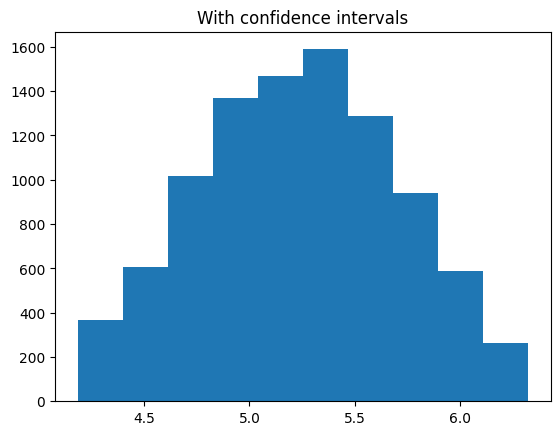

With applied confidence intervals sampled means ranges in [4.183997236828656, 6.324495545761456]
There is 4782 samples greater than mean=5.236 being 51.0%


In [5]:
alpha = 0.05

sampled_means = sorted(sampled_means)[int(N * alpha/2):-int(N*alpha/2)]
plt.hist(sampled_means)
plt.title("With confidence intervals")
plt.show()

N_above_mean = np.sum(sampled_means >= mean)

print(f"With applied confidence intervals sampled means ranges in [{sampled_means[0]}, {sampled_means[-1]}]")
print(f"There is {N_above_mean} samples greater than {mean=} being {np.ceil(N_above_mean/len(sampled_means)*100)}%")

# Bootstrap Test

## Being given array

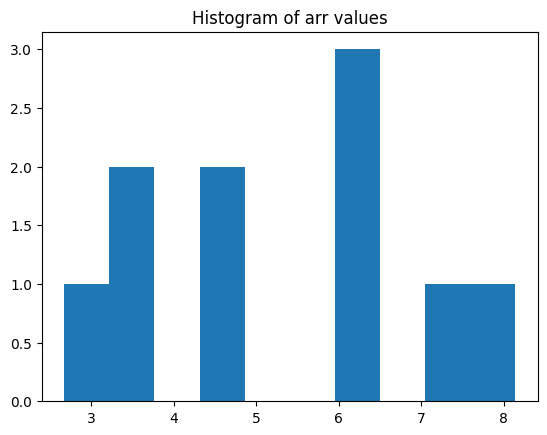

In [6]:
arr = np.array([6.20, 4.34, 8.14, 6.24, 3.72, 3.54, 4.35, 2.67, 7.16, 6.00])

plt.hist(arr)
plt.title("Histogram of arr values")
plt.show()

## Testing a hypothesis

$H_0$: Expected value of population is equal to 0
$$
H_0: \space \mu = 0
$$

mean=5.236 +/- 1.6734049121476848


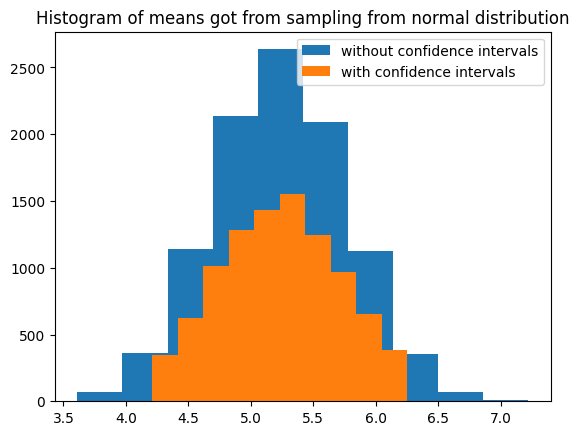

values with confidence intervals ranges in [4.621, 4.635000000000001]
There is 4750 values above mean=5.236


In [7]:
N = int(1e4)
np.random.seed(42)

mean = np.mean(arr)
std = np.std(arr)
print(f"{mean=} +/- {std}")

sampled_means = []
for i in range(N):
    sampled_means.append(np.mean(np.random.choice(arr, size=len(arr), replace=True)))




## Applaing confidence intervals
alpha = 0.05

sampled_means_ci = sorted(sampled_means)[int(N * alpha/2):-int(N*alpha/2)]


plt.hist(sampled_means, label="without confidence intervals")
plt.hist(sampled_means_ci, label="with confidence intervals")
plt.title("Histogram of means got from sampling from normal distribution")
plt.legend()
plt.show()

print(f"values with confidence intervals ranges in [{sampled_means[0]}, {sampled_means[-1]}]")
print(f"There is {np.sum([1 if m>mean else 0 for m in sampled_means_ci])} values above {mean=}")

### Hypothesis $H_0$ is not true

# Permutation Test (uncorralted observation)

## Data
We are given measurments of Cortisol level in blood for high or low dose of blude light

low_mean=294.90909090909093 +/- 57.473242067235155
high_mean=231.35294117647058 +/- 52.144528985447614


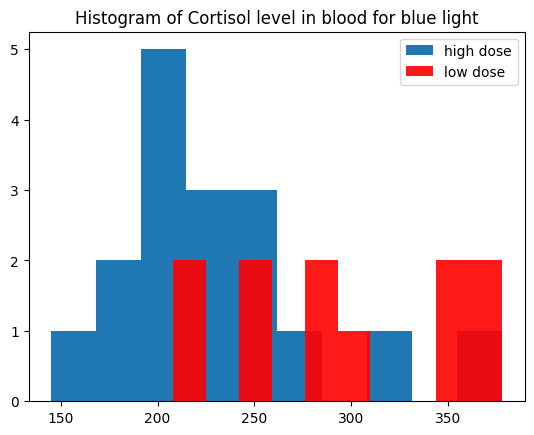

In [8]:
low_dose = np.array([378, 346,245,285,365,245,208,360,296,224,292])
high_dose = np.array([218,264,211,180,256,240, 261, 205, 145, 195, 187,210,378, 204, 232, 237,310])

low_mean = np.mean(low_dose)
low_std = np.std(low_dose)

high_mean = np.mean(high_dose)
high_std = np.std(high_dose)

plt.hist(high_dose, label="high dose")
plt.hist(low_dose, label="low dose", alpha=0.9, color="red")

print(f"{low_mean=} +/- {low_std}\n{high_mean=} +/- {high_std}")
plt.title("Histogram of Cortisol level in blood for blue light")
plt.legend()
plt.show()


## Null Hypothesis
$H_0$: blood cortisol level is not related with blue light dose

## Permutation Test

values with confidence intervals for low doses ranges in [237.11764705882354, 274.7647058823529]
There is 0 values above low_mean=294.90909090909093

values with confidence intervals for high doses ranges in [227.8181818181818, 286.0]
There is 9560 values above high_mean=231.35294117647058


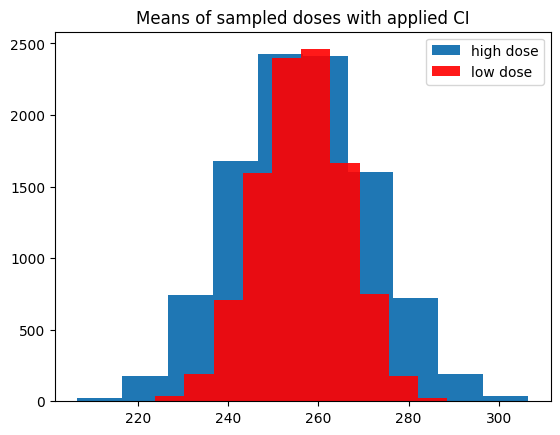

In [9]:
N = int(1e4)
np.random.seed(42)

all_doses = np.concatenate((low_dose, high_dose))


sampled_means_low = []
sampled_means_high = []

idx = len(low_dose)
for i in range(N):
    np.random.shuffle(all_doses)
    sampled_means_low.append(np.mean(all_doses[idx:]))
    sampled_means_high.append(np.mean(all_doses[:idx]))

sampled_means_low = np.array(sampled_means_low)
sampled_means_high = np.array(sampled_means_high)

# Apply confidence intervals
alpha = 0.05
sampled_means_low_ci = sorted(sampled_means_low)[int(N * alpha/2):-int(N*alpha/2)]
sampled_means_high_ci = sorted(sampled_means_high)[int(N * alpha/2):-int(N*alpha/2)]

print(f"values with confidence intervals for low doses ranges in [{sampled_means_low_ci[0]}, {sampled_means_low_ci[-1]}]")
print(f"There is {np.sum(sampled_means_low > low_mean)} values above {low_mean=}\n")

print(f"values with confidence intervals for high doses ranges in [{sampled_means_high_ci[0]}, {sampled_means_high_ci[-1]}]")
print(f"There is {np.sum(sampled_means_high > high_mean)} values above {high_mean=}")

plt.title("Means of sampled doses with applied CI")
plt.hist(sampled_means_high, label="high dose")
plt.hist(sampled_means_low, label="low dose",color="red", alpha=0.9)
plt.legend()
plt.show()


In [10]:
mean_diff = high_mean - low_mean
sampled_means_diff = sampled_means_high - sampled_means_low

N_above_mean  = np.sum(sampled_means_diff > mean_diff)
print(f"There is {N_above_mean} samples greater than {mean_diff=}")

p_value = (np.sum(np.abs(sampled_means_diff) >= np.abs(mean_diff)) / N)


print(f"{p_value=}")

There is 9971 samples greater than mean_diff=-63.556149732620355
p_value=0.0082


as we set $\alpha = 0.05$ and got $p = 0.0082$.
$$
\alpha = 0.05 > p = 0.0082
$$

we reject the null hypothesis

# Chocolate and Endorphines (corralted observation)
$H_0$: The chocolate consumption doesn't affect endorphins level

### Data
We are given 11 pair of endorphins level before and after chocolate consumption.

### Test
We will perform a sign permutation test of differences for $H_0$ hypothesis with confidence $\alpha = 0.05$

## Data

observed_diff=-17.363636363636363 +/- 16.266377633705485


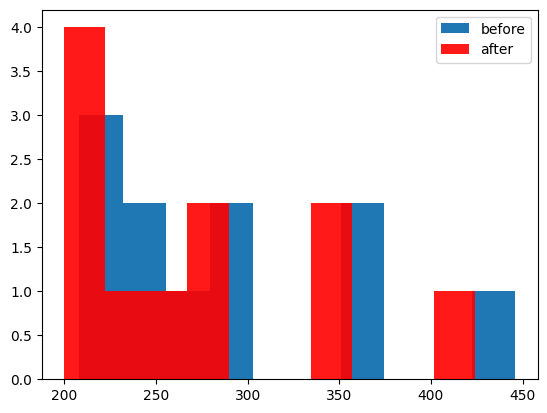

In [11]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])

differences = after - before
observed_diff = np.mean(differences)

print(f"{observed_diff=} +/- {np.std(differences)}")

plt.hist(before, label="before")
plt.hist(after, label="after", color="red", alpha=0.9)
plt.legend()
plt.show()

## Permutation test

before sample means with confidence intervals: [-14.272727272727273, 13.727272727272727]
after sample means with confidence intervals: [-14.272727272727273, 13.727272727272727]


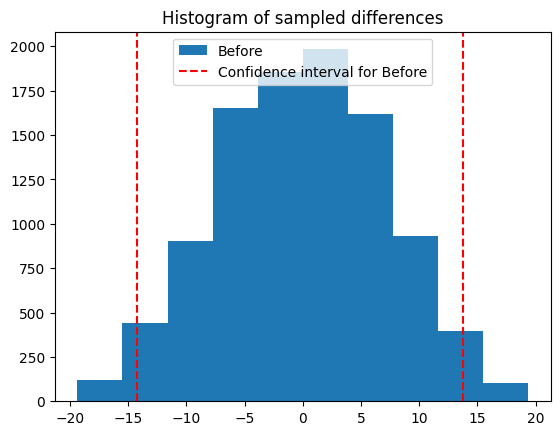

In [12]:
N = int(1e4)
idx = len(before)

differences_abs = np.abs(differences)

null_distribution = []
for i in range(N):
    signs = np.random.choice([-1, 1], size=len(differences_abs))
    null_distribution.append(np.mean(signs*differences_abs))


null_distribution = np.array(null_distribution)


alpha = 0.05
null_distribution_ci = sorted(null_distribution)[int(N * alpha/2):-int(N*alpha/2)]


print(f"before sample means with confidence intervals: [{null_distribution_ci[0]}, {null_distribution_ci[-1]}]")
print(f"after sample means with confidence intervals: [{null_distribution_ci[0]}, {null_distribution_ci[-1]}]")

plt.title("Histogram of sampled differences")
plt.hist(null_distribution, label="Before")

plt.axline([null_distribution_ci[0],0], [null_distribution_ci[0], 1], color="red", linestyle="--", label="Confidence interval for Before")
plt.axline([null_distribution_ci[-1],0], [null_distribution_ci[-1], 1], color="red", linestyle="--")


plt.legend()
plt.show()

# Differences and p-value

In [13]:
p = np.sum(np.abs(null_distribution) >= np.abs(observed_diff))/N
print(f"{observed_diff=}")
print(f"{p=}")

observed_diff=-17.363636363636363
p=0.0092


We can rejcet a null hypothesis

$$
\alpha =0.05 > p=0.009
$$

as observed diff is lower than $0$ we know that chocolate consumption lowers endorphins levels